<center>
<h1>Introduction to Jet Images and Computer Vision</h1>
<h3>Michela Paganini - Yale University</h3>
<h4>High Energy Phenomenology, Experiment and Cosmology Seminar Series</h4>
<img src='http://www.edustart.org/wp-content/uploads/2014/03/MIST-Vert-Aggie-Maroon-page-001-300x200.jpg'>
</center>


* What is a jet image?
* Uniqueness wrt to natural images
* Jet image classification papers
* Regression tasks?
* Generation
* Towards deep learning-based calorimetry

Material:
 1. Ben Nachman's plenary talk at ACAT 2017 (<a href="https://indico.cern.ch/event/567550/contributions/2656471/attachments/1510207/2354761/Nachman_ACAT.pdf">slides</a>)
 1. My talk on Generative Adversarial Networks for jet images at the 2017 IML Workshop (<a href="http://cds.cern.ch/record/2256878?ln=en">video</a>)
 1. Jannicke Pearkes's talk on boosted top tagging with jet images at the 2017 IML Workshop (<a href="http://cds.cern.ch/record/2256876?ln=en">video</a>)
 1. Michael Kagan's overview talk at LHCP 2017 (<a href="https://cds.cern.ch/record/2267879?ln=en">slides</a>)
 1. ATLAS PUB Note on quark vs gluon tagging with jet images(<a href="https://cds.cern.ch/record/2275641/files/ATL-PHYS-PUB-2017-017.pdf">note</a>)
 1. Lynn Huynh's summer report on jet image pre-processing (<a href="https://cds.cern.ch/record/2209127/files/Lynn_Huynh_Report.pdf">write-up</a>)
 1. Ben Nachman's talk at DataScience@LHC 2015 (<a href="http://cds.cern.ch/record/2069153">video</a>)

# Dataset

[![DOI](https://zenodo.org/badge/DOI/10.17632/4r4v785rgx.1.svg)](https://doi.org/10.17632/4r4v785rgx.1)

<a href="https://zenodo.org/record/269622#.WgZFPRNSyRs"><img src="images/zenodo.jpg"></a>

Although the dataset was released in conjunction with the arXiv publication of our [work on Generative Adversarial Networks for jet images](https://arxiv.org/pdf/1701.05927.pdf), it was previously used in the original "[Jet Images -- Deep Learning Edition](https://link.springer.com/article/10.1007%2FJHEP07%282016%29069)" work on jet image classification. Feel free to explore the dataset and use it for any project you have in mind (please cite the dataset and relevant publications explaining its generation!)

### Download dataset from Zenodo

In [1]:
import os
from keras.utils.data_utils import get_file

# Info for downloading the dataset from Zenodo
MD5_HASH = 'f9b11c46b6a0ff928bec2eccf865ecf0'
DATAFILE = 'jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'
URL_TEMPLATE = 'https://zenodo.org/record/{record}/files/{filename}'

print('[INFO] MD5 verification: {}'.format(MD5_HASH))

datafile = get_file(
    fname=DATAFILE,
    origin=URL_TEMPLATE.format(record=269622, filename=DATAFILE),
    md5_hash=MD5_HASH
)

Using TensorFlow backend.


[INFO] MD5 verification: f9b11c46b6a0ff928bec2eccf865ecf0


# Jets at the LHC

<img src="http://cms.web.cern.ch/sites/cms.web.cern.ch/files/styles/large/public/field/image/jets_v1.png?itok=ULcYw1lS">

Jets are the observable result of quarks and gluons scattering at high energy. A collimated stream of
protons and other hadrons forms in the direction of the initiating quark or gluon. Clusters of such
particles are called jets.

# Jet Images

Mature field of research! (image courtesy of B.P.Nachman) 
<img src="./images/graph.jpg" width="800">
<a href="https://arxiv.org/abs/1709.04464"><img src="./images/jet.jpg" width="600" align="right" style="border:5px solid black"></a>


### What is a jet image?

<img src="./images/jet_image.jpg" width="300">

> A jet image is a two-dimensional representation of the radiation pattern within a jet: the distribution of the locations and energies of the jet’s constituent particles. The jet image consists of a regular grid of pixels in η×φ. 

Advantages of this data format include: easy visual inspection, fixed-length representation, suitable for application of computer vision techniques.

### Pre-processing

In the dataset we will be using today:

> The finite granularity of a calorimeter is simulated with a regular 0.1×0.1 grid in η and φ. The energy of each calorimeter cell is given by the sum of the energies of all particles incident on the cell. Cells with positive energy are assigned to jets using the anti-kt clustering algorithm with a radius parameter of R = 1.0 via the software package FastJet 3.2.1.

> To mitigate the contribution from the underlying event, jets are are trimmed by re-clustering the constituents into R = 0.3 kt subjets and dropping those which have less than 5% of the transverse momentum of the parent jet. Trimming also reduces the impact of pileup: multiple proton-proton collisions occurring in the same event as the hard-scatter process. Jet images are formed by translating the η and φ of all constituents of a given jet so that its highest pT subjet is centered at the origin.

> A rectangular grid of η × φ ∈ [−1.25, 1.25] × [−1.25, 1.25] with 0.1 × 0.1 pixels centered at the origin
forms the basis of the jet image. The intensity of each pixel is the pT corresponding to the energy
and pseudorapditiy of the constituent calorimeter cell, pT = E_cell/ cosh(η_cell). The radiation pattern
is symmetric about the origin of the jet image and so the images are rotated. The subjet with the
second highest pT (or, in its absence, the direction of the first principle component) is placed at an
angle of −π/2 with respect to the η − φ axes. Finally, a parity transform about the vertical axis is
applied if the left side of the image has more energy than the right side.

<div align="right">
  <i>Learning Particle Physics by Example: Location-Aware Generative Adversarial Networks for Physics Synthesis</i> <br>
  [arXiv:1701.05927](https://arxiv.org/pdf/1701.05927.pdf)
</div>

References: 
* Section 3 of [arXiv:1511.05190](https://link.springer.com/content/pdf/10.1007%2FJHEP07%282016%29069.pdf)
* <a href="https://link.springer.com/article/10.1007/s41781-017-0004-6#Sec16">Appendix B</a> of [arXiv:1701.05927](https://arxiv.org/pdf/1701.05927.pdf)

### Uniqueness with respect to natural images in ML literature

# Hands-on tutorial

In [2]:
import h5py
import numpy as np
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
%matplotlib inline

In [104]:
# number of images to load
nb_points = 800000

In [105]:
# open hdf5 data file
d = h5py.File(datafile, 'r')

In [106]:
# content of the dataset
d.items()

[(u'image', <HDF5 dataset "image": shape (872666, 25, 25), type "<f4">),
 (u'jet_delta_R', <HDF5 dataset "jet_delta_R": shape (872666,), type "<f4">),
 (u'jet_eta', <HDF5 dataset "jet_eta": shape (872666,), type "<f4">),
 (u'jet_mass', <HDF5 dataset "jet_mass": shape (872666,), type "<f4">),
 (u'jet_phi', <HDF5 dataset "jet_phi": shape (872666,), type "<f4">),
 (u'jet_pt', <HDF5 dataset "jet_pt": shape (872666,), type "<f4">),
 (u'signal', <HDF5 dataset "signal": shape (872666,), type "<f4">),
 (u'tau_1', <HDF5 dataset "tau_1": shape (872666,), type "<f4">),
 (u'tau_2', <HDF5 dataset "tau_2": shape (872666,), type "<f4">),
 (u'tau_21', <HDF5 dataset "tau_21": shape (872666,), type "<f4">),
 (u'tau_3', <HDF5 dataset "tau_3": shape (872666,), type "<f4">),
 (u'tau_32', <HDF5 dataset "tau_32": shape (872666,), type "<f4">)]

In [107]:
# extract a random subset of samples
ix = range(d['image'].shape[0])
np.random.shuffle(ix)
ix = ix[:nb_points]

images, labels = d['image'][:][ix], d['signal'][:][ix]
mass = d['jet_mass'][:][ix]
delta_R = d['jet_delta_R'][:][ix]
tau_21 = d['tau_21'][:][ix]

In [108]:
def plot_jet_image(content, output_fname=None, vmin=1e-6, vmax=300, title=''):
    '''
    Function to help you visualize a jet image on a log scale
    Args:
    -----
        content : numpy array of dimensions 25x25, first arg to imshow, 
            content of the image
            e.g.: images.mean(axis=0) --> the average image

        output_fname : string, name of the output file where the plot will be 
            saved. 

        vmin : (default = 1e-6) float, lower bound of the pixel intensity 
            scale before saturation

        vmax : (default = 300) float, upper bound of the pixel intensity 
            scale before saturation

        title : (default = '') string, title of the plot, to be displayed 
            on top of the image
    '''
    fig, ax = plt.subplots(figsize=(7, 6))
    extent = [-1.25, 1.25, -1.25, 1.25]

    im = ax.imshow(content, interpolation='nearest',
                   norm=LogNorm(vmin=vmin, vmax=vmax), extent=extent)

    cbar = plt.colorbar(im, fraction=0.05, pad=0.05)
    cbar.set_label(r'Pixel $p_T$ (GeV)', y=0.85)
    plt.xlabel(r'[Transformed] Pseudorapidity $(\eta)$')
    plt.ylabel(r'[Transformed] Azimuthal Angle $(\phi)$')
    plt.title(title)

    if output_fname is None:
        plt.savefig(output_fname)

In [109]:
def plot_diff_jet_image(content, output_fname=None, extr=None, title='',
                        cmap=matplotlib.cm.seismic):
    '''
    Function to help you visualize the difference between two sets of jet 
        images on a linear scale
    Args:
    -----
        content : numpy array of dimensions 25x25, first arg to imshow, 
            content of the image
            e.g.: sig_images.mean(axis=0) - bkg_images.mean(axis=0)
        output_fname : string, name of the output file where the plot will be 
            saved.
        extr : (default = None) float, magnitude of the upper and lower 
            bounds of the pixel intensity scale before saturation (symmetric 
            around 0)
        title : (default = '') string, title of the plot, to be displayed on 
            top of the image
        cmap : (default = matplotlib.cm.PRGn_r) matplotlib colormap, ideally 
            white in the middle
    '''
    fig, ax = plt.subplots(figsize=(6, 6))
    extent = [-1.25, 1.25, -1.25, 1.25]
    if extr == None:
        extr = max(abs(content.min()), abs(content.max()))
    im = ax.imshow(
        content,
        interpolation='nearest',
        norm=Normalize(vmin=-extr, vmax=+extr), extent=extent,
        cmap=cmap
    )

    plt.colorbar(im, fraction=0.05, pad=0.05)
    plt.xlabel(r'[Transformed] Pseudorapidity $(\eta)$')
    plt.ylabel(r'[Transformed] Azimuthal Angle $(\phi)$')
    plt.title(title)

    if output_fname:
        plt.savefig(output_fname)


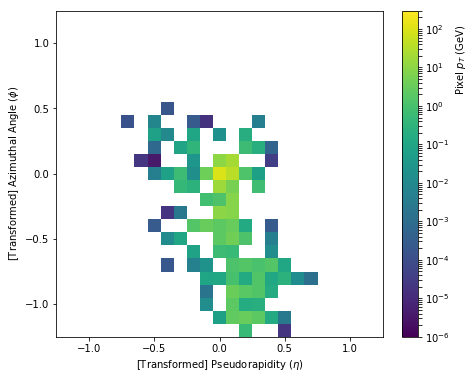

In [110]:
# visualize a jet image
plot_jet_image(images[0])

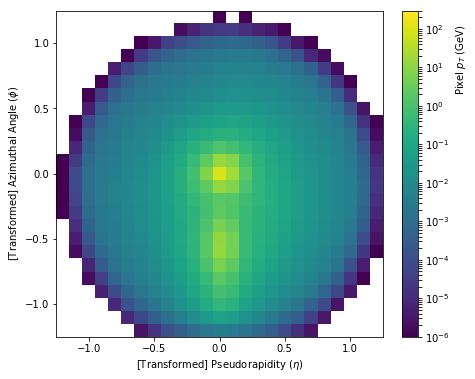

In [111]:
# visualize the average jet image
plot_jet_image(images.mean(axis=0))

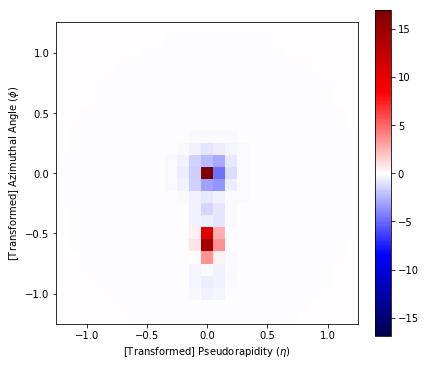

In [112]:
# visualize the difference between the average signal and the average background image
plot_diff_jet_image(
    images[labels == 1].mean(axis=0) - images[labels == 0].mean(axis=0)
)

## Looking at Physics features

In [113]:
def plot_physics_feature(feature_name, feature, labels, bins=None, output_fname=None):

    # if bins are not defined when function is called, define them here
    if not bins:
        bins = np.linspace(feature.min(), feature.max(), 50)

    fig, ax = plt.subplots(figsize=(6, 6))

    _ = plt.hist(feature[labels == 1], bins=bins, histtype='step',
                 label=r"Signal ($W' \rightarrow WZ$)",
                 normed=True, color='red')

    _ = plt.hist(feature[labels == 0], bins=bins, histtype='step',
                 label=r'Background (QCD dijets)', normed=True, color='blue')

    plt.xlabel(r'Discretized {} of Jet Image'.format(feature_name))
    plt.ylabel(r'Units normalized to unit area')
    plt.legend()

    if output_fname:
        plt.savefig(output_fname)


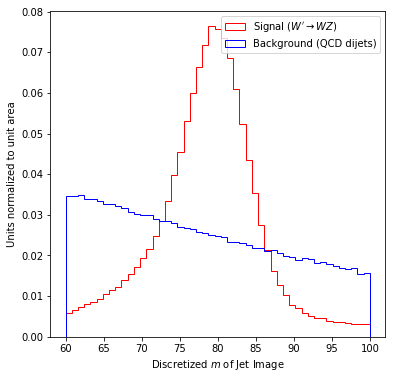

In [114]:
plot_physics_feature(r'$m$', mass, labels)

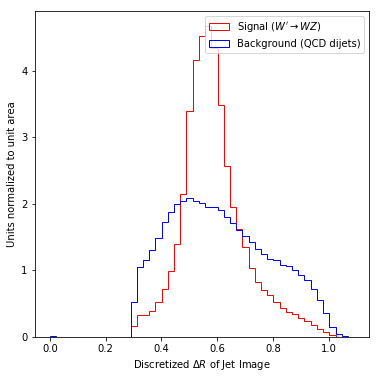

In [115]:
plot_physics_feature(r'$\Delta R$', delta_R, labels)

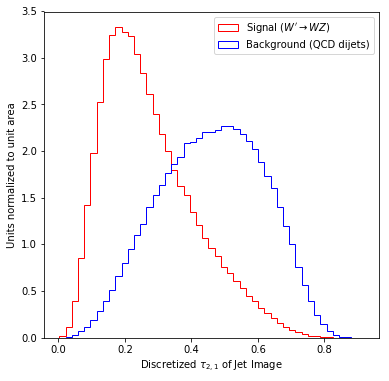

In [116]:
plot_physics_feature(r'$\tau_{2,1}$', tau_21, labels)

## Simple physics-based classifier

#### Data processing

In [117]:
features = np.stack((mass, tau_21, delta_R)).T

In [118]:
features

array([[ 82.80284882,   0.58764875,   0.37826636],
       [ 77.60725403,   0.6016323 ,   0.73774993],
       [ 79.80397034,   0.30116847,   0.73122114],
       ..., 
       [ 68.78720093,   0.44446832,   0.68609524],
       [ 84.27947235,   0.28395078,   0.63178551],
       [ 76.90675354,   0.37930188,   0.54186279]], dtype=float32)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# 80% train+validate, 20% test
images_train, images_test, \
    labels_train, labels_test, \
    features_train, features_test \
    = train_test_split(images, labels, features,
                       test_size=0.2)

# 64% train, 16% validate
images_train, images_val, \
    labels_train, labels_val, \
    features_train, features_val \
    = train_test_split(images_train, labels_train, features_train,
                       test_size=0.2)

In [121]:
print ('{} training samples\n{} validation samples\n{} testing samples'
       .format(images_train.shape[0], images_val.shape[0], images_test.shape[0]))

512000 training samples
128000 validation samples
160000 testing samples


In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_val = scaler.transform(features_val)
features_test = scaler.transform(features_test)

#### Model

In [124]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [125]:
x = Input(shape=(features_train.shape[1], ))
h = Dense(64, activation='relu')(x)
# h = Dropout(0.1)(h)
h = Dense(64, activation='relu')(h)
# h = Dropout(0.1)(h)
h = Dense(64, activation='relu')(h)
# h = Dropout(0.1)(h)
y = Dense(1, activation='sigmoid')(h)

In [126]:
baseline_model = Model(x, y)
baseline_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [127]:
baseline_model.fit(
    features_train, labels_train,
    epochs=200,
    batch_size=128,
    validation_data=(features_val, labels_val),
    callbacks=[
        EarlyStopping(verbose=True, patience=15, monitor='val_loss'),
        ModelCheckpoint('./models/baseline-model.h5', monitor='val_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 512000 samples, validate on 128000 samples
Epoch 1/200
512000/512000 [==============================] - 20s 39us/step - loss: 0.4542 - acc: 0.7907 - val_loss: 0.4535 - val_acc: 0.7908
Epoch 2/200
512000/512000 [==============================] - 20s 39us/step - loss: 0.4515 - acc: 0.7923 - val_loss: 0.4527 - val_acc: 0.7908
Epoch 3/200
512000/512000 [==============================] - 19s 38us/step - loss: 0.4510 - acc: 0.7925 - val_loss: 0.4522 - val_acc: 0.7916
Epoch 4/200
512000/512000 [==============================] - 20s 38us/step - loss: 0.4508 - acc: 0.7929 - val_loss: 0.4519 - val_acc: 0.7913
Epoch 5/200
512000/512000 [==============================] - 18s 35us/step - loss: 0.4506 - acc: 0.7928 - val_loss: 0.4518 - val_acc: 0.7916
Epoch 6/200
512000/512000 [==============================] - 20s 38us/step - loss: 0.4504 - acc: 0.7928 - val_loss: 0.4527 - val_acc: 0.7908
Epoch 7/200
512000/512000 [==============================] - 19s 37us/step - loss: 0.4504 - acc: 0.792

512000/512000 [==============================] - 19s 38us/step - loss: 0.4495 - acc: 0.7933 - val_loss: 0.4522 - val_acc: 0.7913
Epoch 31/200
512000/512000 [==============================] - 19s 38us/step - loss: 0.4496 - acc: 0.7930 - val_loss: 0.4518 - val_acc: 0.7916
Epoch 32/200
512000/512000 [==============================] - 19s 37us/step - loss: 0.4495 - acc: 0.7932 - val_loss: 0.4521 - val_acc: 0.7919
Epoch 33/200
512000/512000 [==============================] - 18s 36us/step - loss: 0.4495 - acc: 0.7933 - val_loss: 0.4523 - val_acc: 0.7914
Epoch 00033: early stopping


Keras saves the entire training history, keeping track of whatever metric you specify (here accuracy and loss).

In [128]:
history = baseline_model.history.history
history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

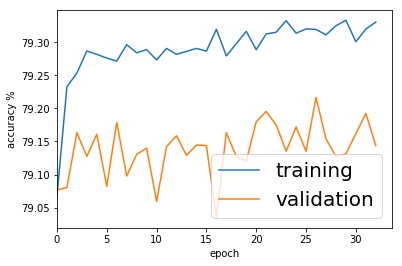

In [129]:
# accuracy plot
plt.plot(100 * np.array(history['acc']), label='training')
plt.plot(100 * np.array(history['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.legend(loc='lower right', fontsize=20)
plt.show()

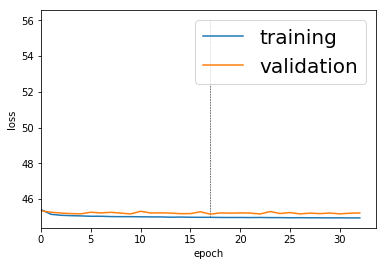

In [130]:
# loss plot
plt.plot(100 * np.array(history['loss']), label='training')
plt.plot(100 * np.array(history['val_loss']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', fontsize=20)
# the line indicate the epoch corresponding to the best performance on the validation set
plt.vlines(np.argmin(history['val_loss']), 45, 56, linestyle='dashed', linewidth=0.5)
plt.show()

In [131]:
print 'Loss estimate on unseen examples (from validation set) = {0:.3f}'.format(np.min(history['val_loss']))

Loss estimate on unseen examples (from validation set) = 0.452


#### Evaluate on test set

In [132]:
baseline_model.load_weights('./models/baseline-model.h5')

In [133]:
yhat_baseline = baseline_model.predict(features_test, batch_size=512)

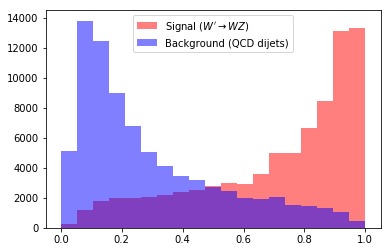

In [134]:
bins = np.linspace(0, 1, 20)
_ = plt.hist(yhat_baseline[labels_test==1],
         histtype='stepfilled', alpha=0.5, color='red', label=r"Signal ($W' \rightarrow WZ$)", bins=bins)
_ = plt.hist(yhat_baseline[labels_test==0],
         histtype='stepfilled', alpha=0.5, color='blue', label=r'Background (QCD dijets)', bins=bins)
plt.legend(loc='upper center')

## Small Convolutional Neural Network

In [135]:
from keras.layers import Conv2D, Flatten

In [136]:
# add channel dimension (1 for grayscale)
images_train = np.expand_dims(images_train, -1)
images_test = np.expand_dims(images_test, -1)
images_val = np.expand_dims(images_val, -1)

In [313]:
x = Input(shape=(images_train.shape[1:]))
h = Conv2D(32, kernel_size=7, strides=1)(x)
h = LeakyReLU()(h)
h = Dropout(0.2)(h)

h = Conv2D(64, kernel_size=7, strides=1)(h)
h = LeakyReLU()(h)
h = Dropout(0.2)(h)

h = Conv2D(128, kernel_size=5, strides=1)(h)
h = LeakyReLU()(h)
h = Dropout(0.2)(h)

h = Conv2D(256, kernel_size=5, strides=1)(h)
h = LeakyReLU()(h)
h = Flatten()(h)
h = Dropout(0.2)(h)
y = Dense(1, activation='sigmoid')(h)

In [314]:
cnn_model = Model(x, y)
cnn_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [315]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 25, 25, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 19, 19, 32)        1600      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 19, 19, 32)        0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        100416    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_91 (Dropout)         (None, 13, 13, 64)        0         
__________

In [316]:
cnn_model.fit(
    images_train, labels_train,
    epochs=100,
    batch_size=512,
    validation_data=(images_val, labels_val),
    callbacks=[
        EarlyStopping(verbose=True, patience=30, monitor='val_loss'),
        ModelCheckpoint('./models/cnn-model.h5', monitor='val_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 512000 samples, validate on 128000 samples
Epoch 1/100
512000/512000 [==============================] - 46s 90us/step - loss: 0.5147 - acc: 0.7598 - val_loss: 0.4759 - val_acc: 0.7780
Epoch 2/100
512000/512000 [==============================] - 43s 85us/step - loss: 0.4625 - acc: 0.7878 - val_loss: 0.4351 - val_acc: 0.8033
Epoch 3/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4533 - acc: 0.7944 - val_loss: 0.4456 - val_acc: 0.7955
Epoch 4/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4475 - acc: 0.7965 - val_loss: 0.4253 - val_acc: 0.8080
Epoch 5/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4427 - acc: 0.7996 - val_loss: 0.4201 - val_acc: 0.8126
Epoch 6/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4387 - acc: 0.8014 - val_loss: 0.4454 - val_acc: 0.7985
Epoch 7/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4373 - acc: 0.802

Epoch 30/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4291 - acc: 0.8068 - val_loss: 0.4011 - val_acc: 0.8229
Epoch 31/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4275 - acc: 0.8078 - val_loss: 0.4368 - val_acc: 0.7985
Epoch 32/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4285 - acc: 0.8076 - val_loss: 0.4091 - val_acc: 0.8182
Epoch 33/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4290 - acc: 0.8072 - val_loss: 0.4333 - val_acc: 0.8011
Epoch 34/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4289 - acc: 0.8069 - val_loss: 0.4085 - val_acc: 0.8182
Epoch 35/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4285 - acc: 0.8070 - val_loss: 0.4461 - val_acc: 0.7996
Epoch 36/100
512000/512000 [==============================] - 44s 86us/step - loss: 0.4280 - acc: 0.8077 - val_loss: 0.4274 - val_acc: 0.8063
Epoch 

KeyboardInterrupt: 

In [317]:
cnn_history = cnn_model.history.history

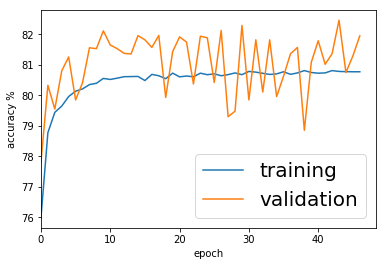

In [318]:
# accuracy plot
plt.plot(100 * np.array(cnn_history['acc']), label='training')
plt.plot(100 * np.array(cnn_history['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.legend(loc='lower right', fontsize=20)
plt.show()

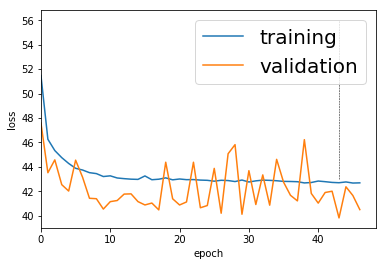

In [319]:
# loss plot
plt.plot(100 * np.array(cnn_history['loss']), label='training')
plt.plot(100 * np.array(cnn_history['val_loss']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', fontsize=20)
# the line indicate the epoch corresponding to the best performance on the validation set
plt.vlines(np.argmin(cnn_history['val_loss']), 43, 56, linestyle='dashed', linewidth=0.5)
plt.show()

In [320]:
print 'Loss estimate on unseen examples (from validation set) = {0:.3f}'.format(np.min(cnn_history['val_loss']))

Loss estimate on unseen examples (from validation set) = 0.398


In [321]:
cnn_model.load_weights('models/cnn-model.h5')
yhat_cnn = cnn_model.predict(images_test, batch_size=512)

## Small Locally-Connected Neural Network

In [148]:
from keras.layers import LocallyConnected2D , MaxPool2D, Flatten

In [281]:
x = Input(shape=(images_train.shape[1:]))
h = LocallyConnected2D(32, kernel_size=9, strides=2)(x)
h = LeakyReLU()(h)

h = Dropout(0.2)(h)
h = LocallyConnected2D(32, kernel_size=5, strides=1)(h)
h = LeakyReLU()(h)

h = Dropout(0.2)(h)
h = LocallyConnected2D(64, kernel_size=3, strides=1)(h)
h = LeakyReLU()(h)

h = Dropout(0.2)(h)
h = LocallyConnected2D(64, kernel_size=3, strides=1)(h)
h = LeakyReLU()(h)

h = Flatten()(h)
h = Dropout(0.2)(h)
y = Dense(1, activation='sigmoid')(h)

In [282]:
lcn_model = Model(x, y)
lcn_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [283]:
lcn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 25, 25, 1)         0         
_________________________________________________________________
locally_connected2d_28 (Loca (None, 9, 9, 32)          212544    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
locally_connected2d_29 (Loca (None, 5, 5, 32)          640800    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 5, 5, 32)          0         
__________

In [284]:
lcn_model.fit(
    images_train, labels_train,
    epochs=100,
    batch_size=256,
    validation_data=(images_val, labels_val),
    callbacks=[
        EarlyStopping(verbose=True, patience=30, monitor='val_loss'),
        ModelCheckpoint('./models/lcn-model.h5', monitor='val_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 512000 samples, validate on 128000 samples
Epoch 1/100
512000/512000 [==============================] - 28s 55us/step - loss: 0.4491 - acc: 0.7967 - val_loss: 0.4267 - val_acc: 0.8105
Epoch 2/100
512000/512000 [==============================] - 26s 50us/step - loss: 0.4238 - acc: 0.8107 - val_loss: 0.4144 - val_acc: 0.8160
Epoch 3/100
512000/512000 [==============================] - 26s 50us/step - loss: 0.4183 - acc: 0.8137 - val_loss: 0.4118 - val_acc: 0.8183
Epoch 4/100
512000/512000 [==============================] - 25s 49us/step - loss: 0.4149 - acc: 0.8162 - val_loss: 0.4065 - val_acc: 0.8198
Epoch 5/100
512000/512000 [==============================] - 25s 49us/step - loss: 0.4120 - acc: 0.8172 - val_loss: 0.4009 - val_acc: 0.8234
Epoch 6/100
512000/512000 [==============================] - 26s 50us/step - loss: 0.4101 - acc: 0.8184 - val_loss: 0.4043 - val_acc: 0.8217
Epoch 7/100
512000/512000 [==============================] - 25s 50us/step - loss: 0.4082 - acc: 0.819

Epoch 30/100
512000/512000 [==============================] - 26s 50us/step - loss: 0.3933 - acc: 0.8277 - val_loss: 0.3912 - val_acc: 0.8290
Epoch 31/100
512000/512000 [==============================] - 26s 50us/step - loss: 0.3925 - acc: 0.8280 - val_loss: 0.3900 - val_acc: 0.8295
Epoch 32/100
512000/512000 [==============================] - 26s 50us/step - loss: 0.3927 - acc: 0.8277 - val_loss: 0.3967 - val_acc: 0.8250
Epoch 33/100
512000/512000 [==============================] - 25s 49us/step - loss: 0.3923 - acc: 0.8279 - val_loss: 0.3950 - val_acc: 0.8251
Epoch 34/100
512000/512000 [==============================] - 26s 50us/step - loss: 0.3925 - acc: 0.8279 - val_loss: 0.3935 - val_acc: 0.8280
Epoch 35/100
512000/512000 [==============================] - 26s 50us/step - loss: 0.3911 - acc: 0.8285 - val_loss: 0.4002 - val_acc: 0.8247
Epoch 36/100
512000/512000 [==============================] - 26s 51us/step - loss: 0.3912 - acc: 0.8289 - val_loss: 0.3929 - val_acc: 0.8282
Epoch 

KeyboardInterrupt: 

In [285]:
lcn_history = lcn_model.history.history

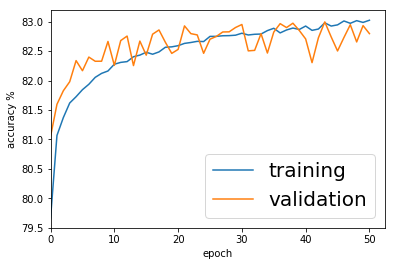

In [286]:
# accuracy plot
plt.plot(100 * np.array(lcn_history['acc']), label='training')
plt.plot(100 * np.array(lcn_history['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.legend(loc='lower right', fontsize=20)
plt.show()

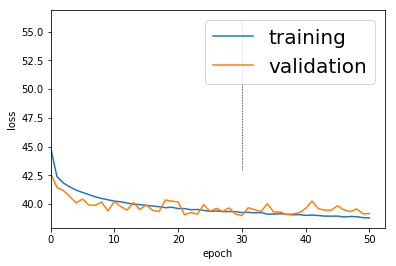

In [287]:
# loss plot
plt.plot(100 * np.array(lcn_history['loss']), label='training')
plt.plot(100 * np.array(lcn_history['val_loss']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', fontsize=20)
# the line indicate the epoch corresponding to the best performance on the validation set
plt.vlines(np.argmin(lcn_history['val_loss']), 43, 56, linestyle='dashed', linewidth=0.5)
plt.show()

In [288]:
print 'Loss estimate on unseen examples (from validation set) = {0:.3f}'.format(np.min(lcn_history['val_loss']))

Loss estimate on unseen examples (from validation set) = 0.390


In [289]:
lcn_model.load_weights('models/lcn-model.h5')
yhat_lcn = lcn_model.predict(images_test, batch_size=512)

## Small Maxout network

In [190]:
from keras.layers import maximum

In [299]:
maxout_dim = 5

x = Input(shape=(images_train.shape[1:]))
h = Flatten()(x)
h = Dense(25 ** 2, kernel_initializer='he_normal')(h)
h = LeakyReLU()(h)

h = Dropout(0.2)(h)
h = Dense(512, kernel_initializer='he_normal')(h)
h = LeakyReLU()(h)

h = Dropout(0.2)(h)
h = Dense(256, kernel_initializer='he_normal')(h)
h = LeakyReLU()(h)

h = Dropout(0.2)(h)
h = Dense(128, kernel_initializer='he_normal')(h)
h = LeakyReLU()(h)

h = Dropout(0.2)(h)
# h = Dense(64, activation='relu')(h)
# h = Dropout(0.2)(h)
y = Dense(1, activation='sigmoid')(h)

In [300]:
dense_model = Model(x, y)
dense_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [301]:
dense_model.fit(
    images_train, labels_train,
    epochs=100,
    batch_size=256,
    validation_data=(images_val, labels_val),
    callbacks=[
        EarlyStopping(verbose=True, patience=30, monitor='val_loss'),
        ModelCheckpoint('./models/dense-model.h5', monitor='val_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 512000 samples, validate on 128000 samples
Epoch 1/100
512000/512000 [==============================] - 18s 34us/step - loss: 0.5309 - acc: 0.7701 - val_loss: 0.4584 - val_acc: 0.7883
Epoch 2/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.4402 - acc: 0.8021 - val_loss: 0.4319 - val_acc: 0.8053
Epoch 3/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.4330 - acc: 0.8065 - val_loss: 0.4299 - val_acc: 0.8090
Epoch 4/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.4295 - acc: 0.8085 - val_loss: 0.4244 - val_acc: 0.8105
Epoch 5/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.4270 - acc: 0.8101 - val_loss: 0.4385 - val_acc: 0.8119
Epoch 6/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.4245 - acc: 0.8109 - val_loss: 0.4193 - val_acc: 0.8139
Epoch 7/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.4228 - acc: 0.812

512000/512000 [==============================] - 15s 29us/step - loss: 0.4016 - acc: 0.8231 - val_loss: 0.4026 - val_acc: 0.8221
Epoch 30/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.4004 - acc: 0.8239 - val_loss: 0.4039 - val_acc: 0.8224
Epoch 31/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.4004 - acc: 0.8240 - val_loss: 0.4114 - val_acc: 0.8207
Epoch 32/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.3999 - acc: 0.8240 - val_loss: 0.4001 - val_acc: 0.8246
Epoch 33/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.3983 - acc: 0.8246 - val_loss: 0.4060 - val_acc: 0.8201
Epoch 34/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.3986 - acc: 0.8250 - val_loss: 0.4100 - val_acc: 0.8198
Epoch 35/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.3986 - acc: 0.8249 - val_loss: 0.3995 - val_acc: 0.8253
Epoch 36/100
512000

Epoch 59/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.3913 - acc: 0.8283 - val_loss: 0.4061 - val_acc: 0.8227
Epoch 60/100
512000/512000 [==============================] - 16s 31us/step - loss: 0.3906 - acc: 0.8290 - val_loss: 0.4063 - val_acc: 0.8238
Epoch 61/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.3902 - acc: 0.8291 - val_loss: 0.3966 - val_acc: 0.8261
Epoch 62/100
512000/512000 [==============================] - 16s 30us/step - loss: 0.3904 - acc: 0.8292 - val_loss: 0.3978 - val_acc: 0.8257
Epoch 63/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.3901 - acc: 0.8287 - val_loss: 0.4019 - val_acc: 0.8253
Epoch 64/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.3901 - acc: 0.8292 - val_loss: 0.3995 - val_acc: 0.8253
Epoch 65/100
512000/512000 [==============================] - 16s 31us/step - loss: 0.3894 - acc: 0.8290 - val_loss: 0.4026 - val_acc: 0.8237
Epoch 

Epoch 90/100
512000/512000 [==============================] - 15s 28us/step - loss: 0.3855 - acc: 0.8310 - val_loss: 0.4108 - val_acc: 0.8268
Epoch 91/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.3848 - acc: 0.8318 - val_loss: 0.4227 - val_acc: 0.8250
Epoch 92/100
512000/512000 [==============================] - 15s 30us/step - loss: 0.3854 - acc: 0.8312 - val_loss: 0.4111 - val_acc: 0.8264
Epoch 93/100
512000/512000 [==============================] - 15s 28us/step - loss: 0.3853 - acc: 0.8313 - val_loss: 0.3994 - val_acc: 0.8267
Epoch 94/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.3845 - acc: 0.8316 - val_loss: 0.3995 - val_acc: 0.8259
Epoch 95/100
512000/512000 [==============================] - 15s 29us/step - loss: 0.3848 - acc: 0.8319 - val_loss: 0.4040 - val_acc: 0.8250
Epoch 96/100
512000/512000 [==============================] - 16s 30us/step - loss: 0.3845 - acc: 0.8324 - val_loss: 0.4045 - val_acc: 0.8238
Epoch 

In [302]:
dense_history = dense_model.history.history

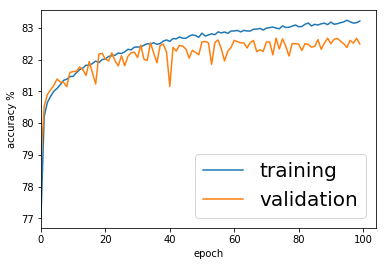

In [303]:
# accuracy plot
plt.plot(100 * np.array(dense_history['acc']), label='training')
plt.plot(100 * np.array(dense_history['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.legend(loc='lower right', fontsize=20)
plt.show()

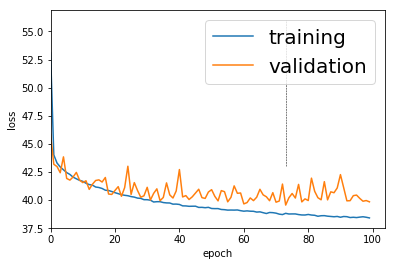

In [304]:
# loss plot
plt.plot(100 * np.array(dense_history['loss']), label='training')
plt.plot(100 * np.array(dense_history['val_loss']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', fontsize=20)
# the line indicate the epoch corresponding to the best performance on the validation set
plt.vlines(np.argmin(dense_history['val_loss']), 43, 56, linestyle='dashed', linewidth=0.5)
plt.show()

In [305]:
print 'Loss estimate on unseen examples (from validation set) = {0:.3f}'.format(np.min(dense_history['val_loss']))

Loss estimate on unseen examples (from validation set) = 0.396


In [306]:
dense_model.load_weights('models/dense-model.h5')
yhat_dense = dense_model.predict(images_test, batch_size=512)

## Plot ROC Curves

In [307]:
from sklearn.metrics import roc_curve

In [322]:
fpr_cnn, tpr_cnn, _ = roc_curve(labels_test, yhat_cnn)
fpr_lcn, tpr_lcn, _ = roc_curve(labels_test, yhat_lcn)
fpr_dense, tpr_dense, _ = roc_curve(labels_test, yhat_dense)
fpr_baseline, tpr_baseline, _ = roc_curve(labels_test, yhat_baseline)

/home/lukedeo/.venvwrp/micky-nb/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/home/lukedeo/.venvwrp/micky-nb/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
/home/lukedeo/.venvwrp/micky-nb/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
/home/lukedeo/.venvwrp/micky-nb/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


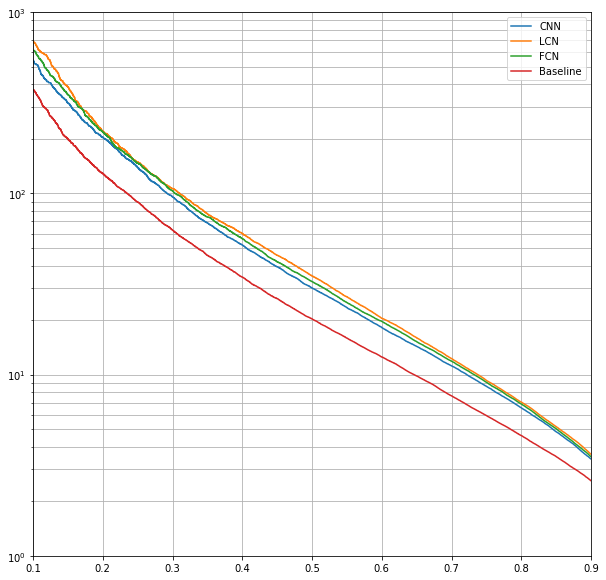

In [323]:
plt.figure(figsize=(10,10))
plt.grid(b = True, which = 'minor')
plt.grid(b = True, which = 'major')
_ = plt.plot(tpr_cnn, 1./fpr_cnn, label='CNN')
_ = plt.plot(tpr_lcn, 1./fpr_lcn, label='LCN')
_ = plt.plot(tpr_dense, 1./fpr_dense, label='FCN')
_ = plt.plot(tpr_baseline, 1./fpr_baseline, label='Baseline')
plt.legend()
plt.xlim((0.1, 0.9))
plt.ylim((1, 1000))
plt.yscale('log')

In [200]:
def get_correlations(images, disc_output):
    '''
    '''
    import pandas as pd
    # -- find the total number of pixels per image, here 25 x 25
    n_pixels = np.prod(images.shape[1:3])
    
    # -- add the pixels as columns to a dataframe
    df = pd.DataFrame({i : np.squeeze(images).reshape(-1, n_pixels)[:, i] for i in range(n_pixels)})
    # -- add a column to the end of the dataframe for the discriminator's output
    df['disc_output'] = disc_output
    # -- pandas offers an easy solution to calculate correlations 
    # (even though it's slow because it also calculates the correlation between each pixel and every other pixel)
    correlations = df.corr().values[:-1, -1]
    return correlations

def plot_correlations(correlations, extent, title='', img_dim=(25, 25), cmap=plt.cm.seismic):

    max_mag = max(
        abs(np.min(correlations[np.isfinite(correlations)])),
        abs(np.max(correlations[np.isfinite(correlations)])),
    ) # highest correlation value (abs value), to make the plot look nice and on a reasonable scale

    f, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(
        correlations.reshape(img_dim),
        interpolation='nearest',
        norm=Normalize(vmin=-max_mag, vmax=max_mag),
        extent=extent,
        cmap=cmap
    )
    
    plt.colorbar(im, fraction=0.05, pad=0.05)
    plt.xlabel(r'[Transformed] Pseudorapidity $(\eta)$')
    plt.ylabel(r'[Transformed] Azimuthal Angle $(\phi)$')
    plt.title(title)
#     plt.savefig(os.path.join('..', outdir, outname))

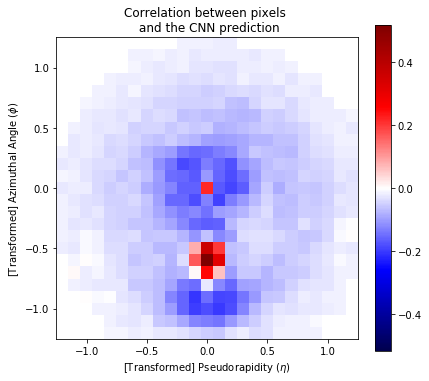

In [201]:
plot_correlations(
    get_correlations(images_test[:10000], yhat_cnn[:10000]),
    extent=[-1.25, 1.25, -1.25, 1.25],
    title='Correlation between pixels \n and the CNN prediction'
)

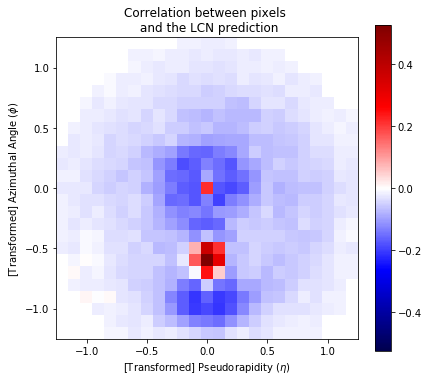

In [202]:
plot_correlations(
    get_correlations(images_test[:10000], yhat_lcn[:10000]),
    extent=[-1.25, 1.25, -1.25, 1.25],
    title='Correlation between pixels \n and the LCN prediction'
)

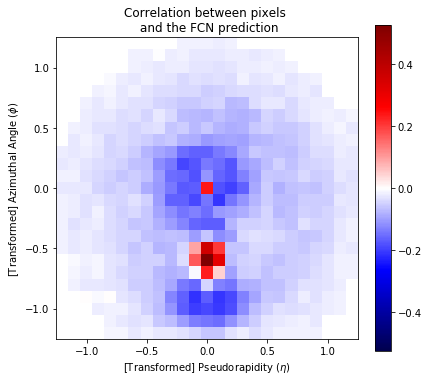

In [203]:
plot_correlations(
    get_correlations(images_test[:10000], yhat_dense[:10000]),
    extent=[-1.25, 1.25, -1.25, 1.25],
    title='Correlation between pixels \n and the FCN prediction'
)

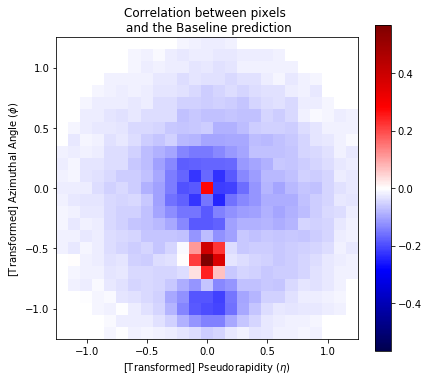

In [204]:
plot_correlations(
    get_correlations(images_test[:10000], yhat_baseline[:10000]),
    extent=[-1.25, 1.25, -1.25, 1.25],
    title='Correlation between pixels \n and the Baseline prediction'
)

In [241]:
def plot_output_vs_kin(kin, output, xlabel, ylabel, nbins=30):
    '''
    Plot one output of the discriminator network vs. one of the 1D physics variables that describe jets
    Args:
    -----
        kin : numpy array, kinematic property (such as mass or pT) associated with each image. I.e.: discrete_mass(np.squeeze(generated_images))
        output : numpy array, one of the 2 outputs of the discriminator, evaluated on the same images that `kin` refers to
        xlabel : string, x-axis label that describes the meaning of `kin`
        ylabel : string, y-axis label that describes the meaning og `output`
        outname : name of the output file, to be placed in ../plots/
        nbins : (default = 30) number of bins to use to represent the distributions in a discretized way
    
    '''
    # set the colormap
    plt.set_cmap('jet')
    # draw a 2d histogram of the discriminator's output versus the kinematic variable of choice (mass, pT, etc.)
    h, binx, biny, _ = plt.hist2d(kin, output.reshape(-1,), bins=nbins)
    plt.clf() # we don't want to plot this 2D histogram, we want to normalize it per bin first
    
    # normalize the histogram such that the entries in each column add up to 1, such that the intensity
    # of each corresponds to the percentage of the jets in a given mass (or pT) bin that get assigned a p
    for i in range(nbins):
        h[i, :] = h[i, :] / float(np.sum(h[i, :]))
    # plot the normalized histogram as an image
    f, ax2 = plt.subplots(figsize=(6, 6))
    im = ax2.imshow(
        np.flipud(h.T), 
        interpolation='nearest',
        norm=LogNorm(),
        extent=[binx.min(), binx.max(), biny.min(), biny.max()],
        aspect="auto"
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # add a custom colorbar
    cax = f.add_axes([0.93, 0.1, 0.03, 0.8])
    plt.colorbar(im, cax = cax)
    plt.set_cmap('viridis')

### Mass

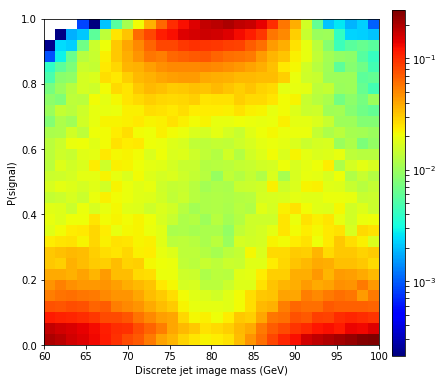

In [242]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_cnn,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

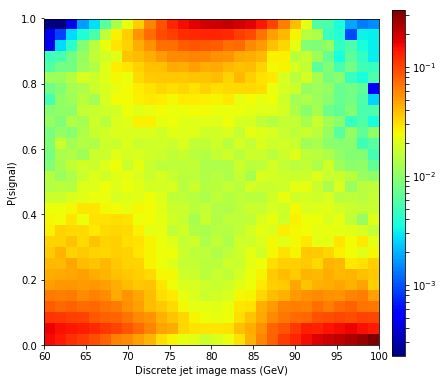

In [243]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_lcn,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

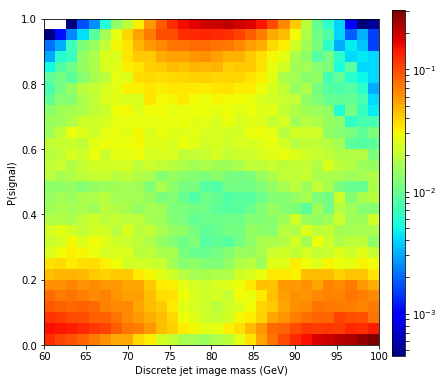

In [244]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_dense,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

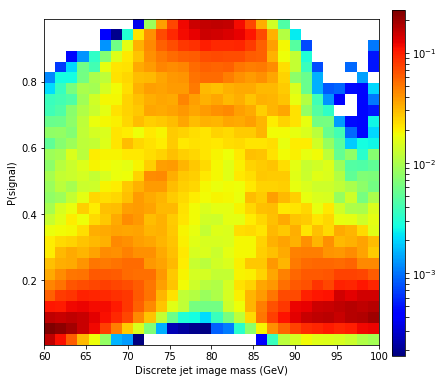

In [245]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_baseline,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

### Tau_21

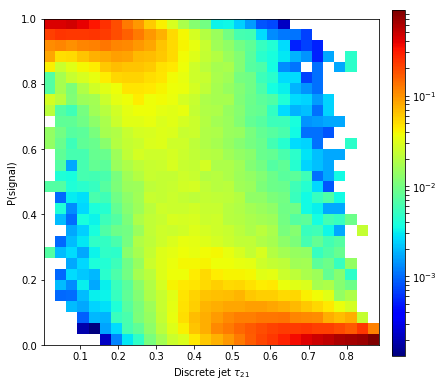

In [246]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 1], # tau21
    yhat_cnn,
    xlabel=r'Discrete jet $\tau_{21}$',
    ylabel='P(signal)',
)

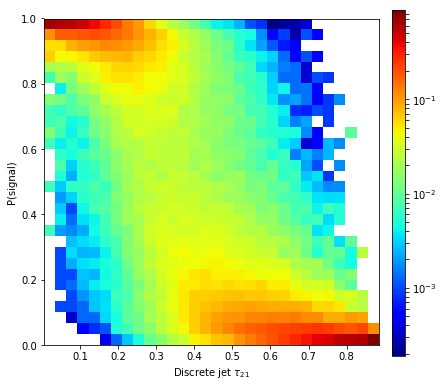

In [247]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 1], # tau21
    yhat_lcn,
    xlabel=r'Discrete jet $\tau_{21}$',
    ylabel='P(signal)',
)

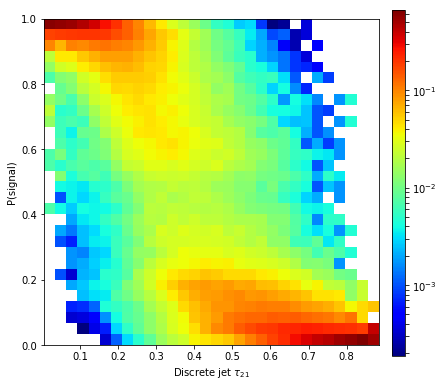

In [248]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 1], # tau21
    yhat_dense,
    xlabel=r'Discrete jet $\tau_{21}$',
    ylabel='P(signal)',
)

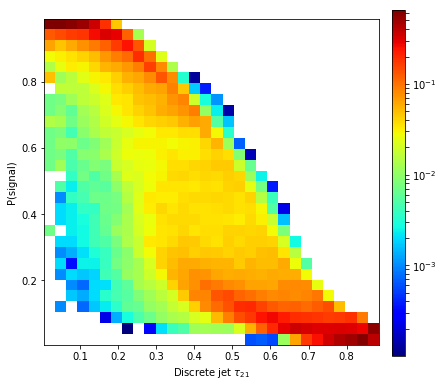

In [249]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 1], # tau21
    yhat_baseline,
    xlabel=r'Discrete jet $\tau_{21}$',
    ylabel='P(signal)',
)

### Delta R

/home/lukedeo/.venvwrp/micky-nb/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide


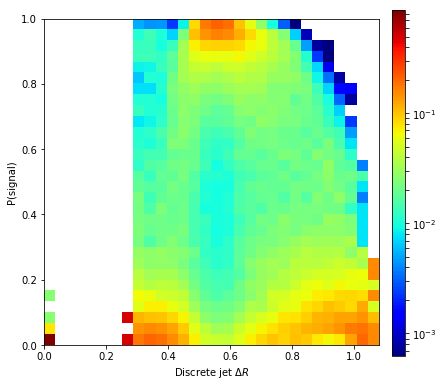

In [250]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 2], # deltaR
    yhat_cnn,
    xlabel=r'Discrete jet $\Delta R$',
    ylabel='P(signal)',
)

/home/lukedeo/.venvwrp/micky-nb/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide


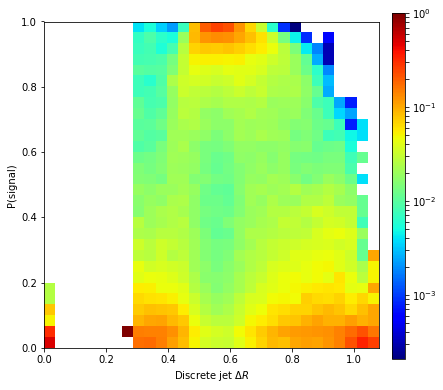

In [251]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 2], # deltaR
    yhat_lcn,
    xlabel=r'Discrete jet $\Delta R$',
    ylabel='P(signal)',
)

/home/lukedeo/.venvwrp/micky-nb/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide


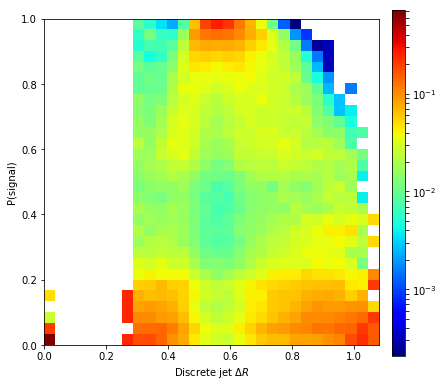

In [252]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 2], # deltaR
    yhat_dense,
    xlabel=r'Discrete jet $\Delta R$',
    ylabel='P(signal)',
)

/home/lukedeo/.venvwrp/micky-nb/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide


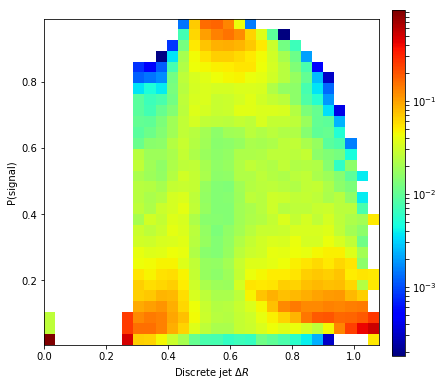

In [253]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 2], # deltaR
    yhat_baseline,
    xlabel=r'Discrete jet $\Delta R$',
    ylabel='P(signal)',
)

# Learn a decorrelated classifier

In [293]:
x = Input(shape=(images_train.shape[1:]))
h = Flatten()(x)
h = Dense(256, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(128, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(64, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(28, activation='relu')(h)
h = Dropout(0.2)(h)
y = Dense(1, activation='sigmoid', name='clf')(h)

In [239]:
x2 = Input(shape=(1, ))
h2 = Dense(10, activation='relu')(x2)
y2 = Dense(1)(h2)

In [294]:
decorr_model = Model(x, y)
decorr_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [230]:
adv_model = Model(x2, y2)
adv_model.compile('adam', 'mse')

In [295]:
from keras.losses import mae

In [296]:
def inv_mae(*args, **kwargs):
    return -mae(*args, **kwargs)

In [258]:
import tensorflow as tf
from keras.engine import Layer
import keras.backend as K

In [283]:
def reverse_gradient(X, hp_lambda):
    '''Flips the sign of the incoming gradient during training.'''
    try:
        reverse_gradient.num_calls += 1
    except AttributeError:
        reverse_gradient.num_calls = 1

    grad_name = "Gradient_Reversal_%d" % reverse_gradient.num_calls

    @tf.RegisterGradient(grad_name)
    def _flip_gradients(op, grad):
        return [tf.negative(grad) * hp_lambda]

    g = K.get_session().graph
    with g.gradient_override_map({'Identity': grad_name}):
        y = tf.identity(X)

    return y

In [284]:
class GradientReversal(Layer):
    '''Flip the sign of gradient during training.'''
    def __init__(self, hp_lambda, **kwargs):
        super(GradientReversal, self).__init__(**kwargs)
        self.supports_masking = False
        self.hp_lambda = hp_lambda

    def build(self, input_shape):
        self.trainable_weights = []

    def call(self, x, mask=None):
        return reverse_gradient(x, self.hp_lambda)

    def get_output_shape_for(self, input_shape):
        return input_shape

    def get_config(self):
        config = {'hp_lambda': self.hp_lambda}
        base_config = super(GradientReversal, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [297]:
decorr_out = Dense(1)(GradientReversal(10.0)(Dense(10, activation='relu')(h)))
combined_model = Model(x, [y, decorr_out])
combined_model.compile('adam', ['binary_crossentropy', inv_mae])

In [298]:
decorr_model.fit(
    images_train, labels_train,
    epochs=3,
    batch_size=1024
)

Epoch 1/3
96000/96000 [==============================] - 2s 23us/step - loss: 0.6734 - acc: 0.6673
Epoch 2/3
96000/96000 [==============================] - 1s 8us/step - loss: 0.5332 - acc: 0.7431
Epoch 3/3
96000/96000 [==============================] - 1s 7us/step - loss: 0.5097 - acc: 0.7609


In [299]:
combined_model.fit(
    images_train, [labels_train, features_train[:, 0]],
    epochs=60,
    batch_size=512,
    validation_data=(images_val, [labels_val, features_val[:, 0]]),
    callbacks=[
        EarlyStopping(verbose=True, patience=30, monitor='val_clf_loss'),
        ModelCheckpoint('./models/decorr-model.h5', monitor='val_clf_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 96000 samples, validate on 24000 samples
Epoch 1/60
96000/96000 [==============================] - 5s 55us/step - loss: 0.0260 - clf_loss: 0.5742 - dense_165_loss: -0.5482 - val_loss: 0.1039 - val_clf_loss: 0.5210 - val_dense_165_loss: -0.4172
Epoch 2/60
96000/96000 [==============================] - 2s 18us/step - loss: 0.1392 - clf_loss: 0.5455 - dense_165_loss: -0.4063 - val_loss: 0.0932 - val_clf_loss: 0.4928 - val_dense_165_loss: -0.3997
Epoch 3/60
96000/96000 [==============================] - 2s 19us/step - loss: 0.1422 - clf_loss: 0.5256 - dense_165_loss: -0.3834 - val_loss: 0.0884 - val_clf_loss: 0.4825 - val_dense_165_loss: -0.3940
Epoch 4/60
96000/96000 [==============================] - 2s 16us/step - loss: 0.1493 - clf_loss: 0.5161 - dense_165_loss: -0.3668 - val_loss: 0.1058 - val_clf_loss: 0.4888 - val_dense_165_loss: -0.3830
Epoch 5/60
96000/96000 [==============================] - 1s 15us/step - loss: 0.1537 - clf_loss: 0.5099 - dense_165_loss: -0.3562 - val_l

Epoch 22/60
96000/96000 [==============================] - 2s 17us/step - loss: -3.3205 - clf_loss: 0.4342 - dense_165_loss: -3.7547 - val_loss: -3.4237 - val_clf_loss: 0.4226 - val_dense_165_loss: -3.8463
Epoch 23/60
96000/96000 [==============================] - 2s 17us/step - loss: -3.5304 - clf_loss: 0.4281 - dense_165_loss: -3.9585 - val_loss: -3.6229 - val_clf_loss: 0.4255 - val_dense_165_loss: -4.0484
Epoch 24/60
96000/96000 [==============================] - 2s 18us/step - loss: -3.7336 - clf_loss: 0.4257 - dense_165_loss: -4.1592 - val_loss: -3.8240 - val_clf_loss: 0.4239 - val_dense_165_loss: -4.2479
Epoch 25/60
96000/96000 [==============================] - 2s 16us/step - loss: -3.9351 - clf_loss: 0.4225 - dense_165_loss: -4.3576 - val_loss: -4.0238 - val_clf_loss: 0.4214 - val_dense_165_loss: -4.4452
Epoch 26/60
96000/96000 [==============================] - 2s 19us/step - loss: -4.1344 - clf_loss: 0.4196 - dense_165_loss: -4.5540 - val_loss: -4.2156 - val_clf_loss: 0.4252 

KeyboardInterrupt: 

In [300]:
combined_model.load_weights('models/decorr-model.h5')

**N.B.** -- this is a very simplistic and not-so-subtle way of encouraging this. Ideally, the classifier wants the adversary to be maximally confused (i.e., no mutual information) not maximally wrong. We're going to do the naive thing here, but [this](https://github.com/glouppe/paper-learning-to-pivot/blob/master/code/Toy.ipynb) is the form that is best suited to doing this decorrelation in probabilistically correct way!

In [423]:
adv_model.trainable = False

In [424]:
combined_model = Model(x, [y, adv_model(y)])
combined_model.compile('adam', ['binary_crossentropy', inv_mse])

In [425]:
decorr_model.fit(
    images_train, labels_train,
    epochs=1,
    batch_size=512,
#     validation_data=(images_val, labels_val),
#     callbacks=[
#         EarlyStopping(verbose=True, patience=30, monitor='val_loss'),
#         ModelCheckpoint('./models/dense-model.h5', monitor='val_loss',
#                         verbose=True, save_best_only=True)
#     ]
)

Epoch 1/1
96000/96000 [==============================] - 5s 55us/step - loss: 0.5888 - acc: 0.7078


In [426]:
for _ in range(10):
    adv_model.fit(
        decorr_model.predict(images_train), features_train[:, 0], # mass
        epochs=5,
        batch_size=512
    )
    combined_model.fit(
        images_train, [labels_train, features_train[:, 0]], # mass
        epochs=1,
        batch_size=512
    )

Epoch 1/5
96000/96000 [==============================] - 3s 29us/step - loss: 0.9884
Epoch 2/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9841
Epoch 3/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9826
Epoch 4/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9820
Epoch 5/5
96000/96000 [==============================] - 0s 4us/step - loss: 0.9817
Epoch 1/1
96000/96000 [==============================] - 5s 55us/step - loss: -0.1039 - dense_140_loss: 0.5129 - model_52_loss: -0.6168
Epoch 1/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9987
Epoch 2/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9852
Epoch 3/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9833
Epoch 4/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9821
Epoch 5/5
96000/96000 [==============================] - 0s 4us/step - loss: 0.9811
Epoch 1/1
96000/96000 [

In [301]:
yhat_decorr = combined_model.predict(images_test)[0]

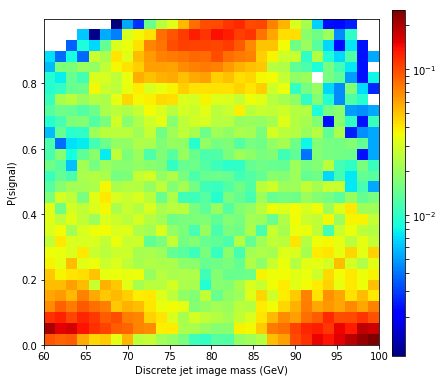

In [302]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_decorr,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

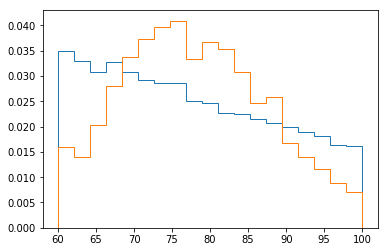

In [303]:
_ = plt.hist(scaler.inverse_transform(features_test)[labels_test==0, 0],
            bins =np.linspace(60, 100, 20), histtype='step', normed=True)
_ = plt.hist(scaler.inverse_transform(features_test)[np.logical_and(labels_test==0, yhat_cnn.ravel()>0.5), 0],
            bins=np.linspace(60, 100, 20), histtype='step', normed=True)

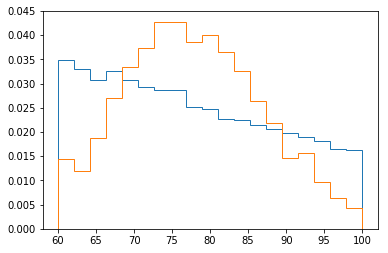

In [304]:
_ = plt.hist(scaler.inverse_transform(features_test)[labels_test==0, 0],
            bins =np.linspace(60, 100, 20), histtype='step', normed=True)
_ = plt.hist(scaler.inverse_transform(features_test)[np.logical_and(labels_test==0, yhat_decorr.ravel()>0.5), 0],
            bins=np.linspace(60, 100, 20), histtype='step', normed=True)

# Training a GAN (WGAN-GP)

In [218]:
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers.merge import _Merge
from keras.layers.convolutional import Convolution2D, Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras import backend as K

In [219]:
BATCH_SIZE = 100

# The training ratio is the number of discriminator updates per generator
# update. The paper uses 5.
TRAINING_RATIO = 5
GRADIENT_PENALTY_WEIGHT = 10  # As per the paper

In [220]:
def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)


def gradient_penalty_loss(y_true, y_pred, averaged_samples,
                          gradient_penalty_weight):
    gradients = K.gradients(K.sum(y_pred), averaged_samples)
    gradient_l2_norm = K.sqrt(K.sum(K.square(gradients)))
    gradient_penalty = gradient_penalty_weight * K.square(1 - gradient_l2_norm)
    return gradient_penalty

In [221]:
def make_generator():
    """Creates a generator model that takes a 100-dimensional latent prior and 
    converts to size 25 x 25 x 1"""

    z = Input(shape=(100, ))
    
    x = Dense(1024, input_dim=100)(z)
    x = LeakyReLU()(x)

    x = Dense(128 * 7 * 7)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Reshape((7, 7, 128))(x)

    x = Conv2DTranspose(128, (5, 5), strides=2, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = LeakyReLU()(x)

    x = Convolution2D(64, (5, 5), padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(64, (5, 5), strides=2, padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = LeakyReLU()(x)

    y = Convolution2D(1, (4, 4), padding='valid', activation='relu')(x)

    return Model(z, y)

In [222]:
def make_discriminator():

    x = Input(shape=(25, 25, 1))
    
    h = Convolution2D(64, (5, 5), padding='same')(x)
    h = LeakyReLU()(h)

    h = Convolution2D(128, (5, 5), kernel_initializer='he_normal',
                      strides=2)(h)
    h = LeakyReLU()(h)

    h = Convolution2D(256, (5, 5), kernel_initializer='he_normal',
                      padding='same', strides=2)(h)
    h = LeakyReLU()(h)

    h = Flatten()(h)
    h = Dense(1024, kernel_initializer='he_normal')(h)
    h = LeakyReLU()(h)

    y = Dense(1, kernel_initializer='he_normal')(h)

    return Model(x, y)

In [223]:
class RandomWeightedAverage(_Merge):

    def _merge_function(self, inputs):
        weights = K.random_uniform((K.shape(inputs[0])[0], 1, 1, 1))
        return (weights * inputs[0]) + ((1 - weights) * inputs[1])

In [224]:
generator = make_generator()
discriminator = make_discriminator()

In [225]:
discriminator.trainable = False

# we train the generator layers here
z = Input(shape=(100, ))
generator_model = Model(z, discriminator(generator(z)))
# We use the Adam paramaters from Gulrajani et al.
generator_model.compile(optimizer=Adam(0.0001, beta_1=0.5, beta_2=0.9),
                        loss=wasserstein_loss)

In [226]:
discriminator.trainable = True
generator.trainable = False

In [227]:
real_samples = Input(shape=(25, 25, 1))
z = Input(shape=(100,))
fake_samples = generator(z)

critic_out_fake = discriminator(fake_samples)
critic_out_real = discriminator(real_samples)

# generate weighted-averages of real and generated
# samples, to use for the gradient norm penalty.
averaged_samples = RandomWeightedAverage()([real_samples, fake_samples])

# running them thru critic to get the gradient norm for the GP loss.
averaged_samples_out = discriminator(averaged_samples)

# The gradient penalty loss function requires the input averaged samples
def gp_loss(y_true, y_pred):
    return gradient_penalty_loss(
        y_true, y_pred,
        averaged_samples=averaged_samples,
        gradient_penalty_weight=GRADIENT_PENALTY_WEIGHT
    )

discriminator_model = Model(
    inputs=[real_samples, z],
    outputs=[critic_out_real, critic_out_fake, averaged_samples_out]
)

# We use the Adam paramaters from Gulrajani et al.
discriminator_model.compile(
    optimizer=Adam(0.0001, beta_1=0.5, beta_2=0.9),
    loss=[wasserstein_loss, wasserstein_loss, gp_loss]
)

In [228]:
# positive_y is the label vector for real samples, with value 1.
# negative_y is the label vector for generated samples, with value -1.
# dummy_y vector is passed to the gradient_penalty loss function and is
# not used.

positive_y = np.ones((BATCH_SIZE, 1), dtype=np.float32)
negative_y = -positive_y
dummy_y = np.zeros((BATCH_SIZE, 1), dtype=np.float32)

In [259]:
# do a little bit of scaling for stability
X_train = np.expand_dims(np.squeeze(images_train[:30000]) / 100, -1)

In [260]:
overall_disc_loss = []
# overall_disc_loss = []
for epoch in range(200):

    np.random.shuffle(X_train)
    print "Epoch: ", epoch
    print "Number of batches: ", int(X_train.shape[0] // BATCH_SIZE)
    discriminator_loss = []
    generator_loss = []

    # we'll need this many samples per critic update
    critic_nb_samples = BATCH_SIZE * TRAINING_RATIO

    for i in range(int(X_train.shape[0] // (BATCH_SIZE * TRAINING_RATIO))):
        X_critic = X_train[i * critic_nb_samples:(i + 1) * critic_nb_samples]

        for j in range(TRAINING_RATIO):
            X_minibatch = X_critic[j * BATCH_SIZE:(j + 1) * BATCH_SIZE]

            noise = np.random.rand(BATCH_SIZE, 100).astype(np.float32)

            disc_loss = discriminator_model.train_on_batch(
                [X_minibatch, noise],
                [positive_y, negative_y, dummy_y]
            )
            discriminator_loss.append(disc_loss)
    
#         this is the critic value
        critic_score = np.array(discriminator_loss)[:, 0]
        if i % 10 == 0:
            print 'critic score =', critic_score.mean()
        overall_disc_loss.extend(critic_score.tolist())
        gen_loss = generator_model.train_on_batch(
            np.random.rand(BATCH_SIZE, 100),
            positive_y
        )
        generator_loss.append(gen_loss)

Epoch:  0
Number of batches:  300
critic score = 0.00151446
critic score = 0.00177793
critic score = 0.00153065
critic score = 0.00159332
critic score = 0.00163725
critic score = 0.00175181
Epoch:  1
Number of batches:  300
critic score = 1.95312e-05
critic score = 0.00115547
critic score = 0.00140326
critic score = 0.00168951
critic score = 0.00162001
critic score = 0.00162208
Epoch:  2
Number of batches:  300
critic score = 0.00291257
critic score = 0.00173013
critic score = 0.00161283
critic score = 0.00150917
critic score = 0.00162098
critic score = 0.001567
Epoch:  3
Number of batches:  300
critic score = 0.00157771
critic score = 0.00117611
critic score = 0.00132732
critic score = 0.00164625
critic score = 0.00148376
critic score = 0.00176319
Epoch:  4
Number of batches:  300
critic score = 0.00420777
critic score = 0.00179685
critic score = 0.00171872
critic score = 0.0015852
critic score = 0.00151661
critic score = 0.00155593
Epoch:  5
Number of batches:  300
critic score = 0.0

KeyboardInterrupt: 

In [329]:
discriminator.save_weights('./models/wgan-discriminator.h5')
generator.save_weights('./models/wgan-generator.h5')

In [272]:
discriminator.load_weights('./models/wgan-discriminator.h5')
generator.load_weights('./models/wgan-generator.h5')

In [324]:
noise = np.random.rand(15000, 100).astype(np.float32)

In [325]:
fake_jets = np.squeeze(generator.predict(noise, batch_size=BATCH_SIZE) * 100)

In [326]:
fake_jets.max()

260.83762

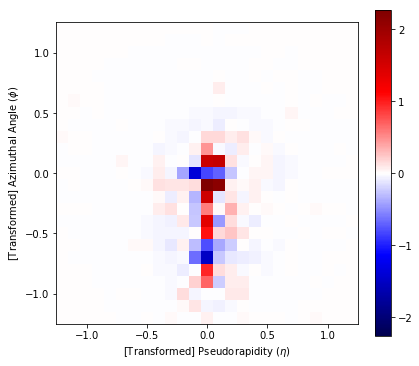

In [327]:
plot_diff_jet_image(fake_jets.mean(0) - images.mean(0))

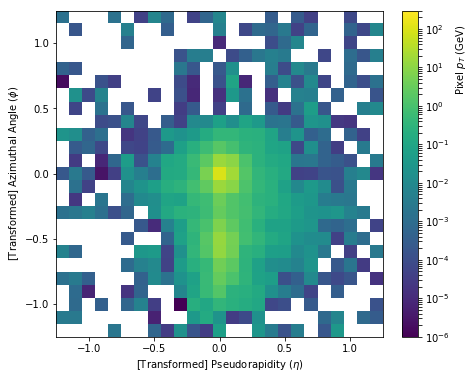

In [328]:
plot_jet_image(fake_jets.mean(0))